# Tuberculose A15 Janeiro 2023 EDA

### Reading the XSL files and convert them to csv

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


# Specify the folder path where your .xls files are located
folder_path = 'tuberxls'

# A list to hold all DataFrames (one per sheet)
dataframes = []

# Loop through each file in the specified folder
for filename in os.listdir(folder_path):
    # Check if the file is an .xls file
    if filename.endswith('.xls'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the file into a DataFrame without headers, assuming the data starts from the first row
        df = pd.read_excel(file_path, header=None, engine='xlrd')
        
        # Directly assign the desired column names
        df.columns = ["Procedimentos realizados", "Frequência"]
        
        # Drop the first two lines of data after the headers have been set
        df = df.drop(index=[0, 1, 2])
        
        # Reset the index to make sure it starts from 0 after dropping rows
        df.reset_index(drop=True, inplace=True)
        
        # Append the DataFrame to our list
        dataframes.append(df)

# Creating DataFrames from the sample data
dataframes = [pd.DataFrame(data) for data in dataframes]

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: wi

### Checking one dataframe

In [2]:
dataframes[2]

,Procedimentos realizados,Frequência
0,0206010079 TOMOGRAFIA COMPUTADORIZADA DO CRANIO,2
1,0206020031 TOMOGRAFIA COMPUTADORIZADA DE TORAX,5
2,0206030037 TOMOGRAFIA COMPUTADORIZADA DE PELVE...,1
3,0301090033 AVALIACAO MULTIDIMENSIONAL DA PESSO...,1
4,Total,9
5,NaN,NaN


In [3]:
dataframes[0].keys()

Index(['Procedimentos realizados', 'Frequência'], dtype='object')

In [4]:
for index, row in dataframes[5].iterrows():
    print(index, row)

0 Procedimentos realizados    0204030170 RADIOGRAFIA DE TORAX (PA)
Frequência                                                     1
Name: 0, dtype: object
1 Procedimentos realizados    0206020031 TOMOGRAFIA COMPUTADORIZADA DE TORAX
Frequência                                                               3
Name: 1, dtype: object
2 Procedimentos realizados    0301010072 CONSULTA MEDICA EM ATENCAO ESPECIAL...
Frequência                                                                 10
Name: 2, dtype: object
3 Procedimentos realizados    0301060029 ATENDIMENTO DE URGENCIA C/ OBSERVAC...
Frequência                                                                  1
Name: 3, dtype: object
4 Procedimentos realizados    0301060096 ATENDIMENTO MEDICO EM UNIDADE DE PR...
Frequência                                                                  1
Name: 4, dtype: object
5 Procedimentos realizados    0301060118 ACOLHIMENTO COM CLASSIFICACAO DE RISCO
Frequência                                     

### Creating a dictionary with all dataframes

In [5]:
# Brazilian states and Federal District
state_names = [
    "Acre", "Alagoas", "Amazonas", "Amapá", "Bahia", "Ceará", "Distrito Federal",
    "Espírito Santo", "Goiás", "Maranhão", "Minas Gerais", "Mato Grosso do Sul", "Mato Grosso",
    "Pará", "Paraíba", "Pernambuco", "Piauí", "Paraná", "Rio de Janeiro",
    "Rio Grande do Norte", "Rondônia", "Roraima", "Rio Grande do Sul", "Santa Catarina",
    "São Paulo", "Sergipe", "Tocantins"
]

# Initialize df_states dictionary
df_states = {state: {} for state in state_names}

for state, df in zip(state_names, dataframes):
    df_states[state] = df.to_dict()

df_states['Amazonas']

{'Procedimentos realizados': {0: '0206010079 TOMOGRAFIA COMPUTADORIZADA DO CRANIO',
  1: '0206020031 TOMOGRAFIA COMPUTADORIZADA DE TORAX',
  2: '0206030037 TOMOGRAFIA COMPUTADORIZADA DE PELVE / BACIA / ABDOMEN INFERIOR',
  3: '0301090033 AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA',
  4: 'Total',
  5: nan},
 'Frequência': {0: 2, 1: 5, 2: 1, 3: 1, 4: 9, 5: nan}}

### Checking the keys (states) e por Estado

In [6]:
df_states.keys()

dict_keys(['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'])

In [7]:
df_states['Amazonas'].keys()

dict_keys(['Procedimentos realizados', 'Frequência'])

### Saving each state dataframe as csv 

In [8]:
for key in df_states:
    # Convert the current state's data to a DataFrame
    df = pd.DataFrame(df_states[key])
    
    # Construct the filename using the state's name
    filename = f"Tuber_{key}_012023.csv"
    
    # Save the DataFrame to a CSV file without the index
    df.to_csv(f"csv/{filename}", index=False)

    print(f"Saved {key} data to {filename}")

Saved Acre data to Tuber_Acre_012023.csv
Saved Alagoas data to Tuber_Alagoas_012023.csv
Saved Amazonas data to Tuber_Amazonas_012023.csv
Saved Amapá data to Tuber_Amapá_012023.csv
Saved Bahia data to Tuber_Bahia_012023.csv
Saved Ceará data to Tuber_Ceará_012023.csv
Saved Distrito Federal data to Tuber_Distrito Federal_012023.csv
Saved Espírito Santo data to Tuber_Espírito Santo_012023.csv
Saved Goiás data to Tuber_Goiás_012023.csv
Saved Maranhão data to Tuber_Maranhão_012023.csv
Saved Minas Gerais data to Tuber_Minas Gerais_012023.csv
Saved Mato Grosso do Sul data to Tuber_Mato Grosso do Sul_012023.csv
Saved Mato Grosso data to Tuber_Mato Grosso_012023.csv
Saved Pará data to Tuber_Pará_012023.csv
Saved Paraíba data to Tuber_Paraíba_012023.csv
Saved Pernambuco data to Tuber_Pernambuco_012023.csv
Saved Piauí data to Tuber_Piauí_012023.csv
Saved Paraná data to Tuber_Paraná_012023.csv
Saved Rio de Janeiro data to Tuber_Rio de Janeiro_012023.csv
Saved Rio Grande do Norte data to Tuber_Rio G

### Creating a merged dataframe

In [9]:
merged_df = {}
for state in state_names:
    data  = {}
    for i in range(len(df_states[state]["Procedimentos realizados"])):
        data[df_states[state]["Procedimentos realizados"][i]] = df_states[state]["Frequência"][i]
    merged_df[state] = data

In [10]:
merged_df = pd.DataFrame(merged_df)

### Replacing NaN values for 0

In [11]:
merged_df = merged_df.replace(np.nan, 0)
merged_df.head()

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
0101010010 ATIVIDADE EDUCATIVA / ORIENTACAO EM GRUPO NA ATENCAO PRIMARIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010028 ATIVIDADE EDUCATIVA / ORIENTACAO EM GRUPO NA ATENCAO ESPECIALIZADA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010036 PRATICA CORPORAL / ATIVIDADE FISICA EM GRUPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010044 PRATICAS CORPORAIS EM MEDICINA TRADICIONAL CHINESA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010052 TERAPIA COMUNITARIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Removing the rows with only zeros

In [12]:
# Calculate the sum across each row
row_sums = merged_df.sum(axis=1)

# Use boolean indexing to filter rows where the sum is greater than 0
filtered_df = merged_df.loc[row_sums > 0]

In [13]:
filtered_df

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
0201010402 BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEUROSCOPIA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0201010542 BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA COMPUTADORIZADA / ULTRASSONOGRAFIA / RESSONANCIA MAGNE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
0202010120 DOSAGEM DE ACIDO URICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0202010180 DOSAGEM DE AMILASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0202010201 DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0412030128 RETIRADA DE DRENO TUBULAR TORACICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0412050170 TORACOCENTESE/DRENAGEM DE PLEURA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0
0803010010 AJUDA DE CUSTO P/ ALIMENTACAO/PERNOITE DE PACIENTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0803010044 AJUDA DE CUSTO PARA ALIMENTACAO/PERNOITE DE ACOMPANHANTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dropping the Total row

In [14]:
filtered_df_drop_Total = filtered_df.drop("Total")

In [15]:
filtered_df_drop_Total.describe()

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
count,101.0,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.0
mean,0.0,0.049505,0.089109,0.0,0.227723,0.188119,0.089109,0.019802,0.049505,0.158416,0.732673,0.217822,0.158416,0.198020,0.009901,0.445545,0.009901,0.099010,2.841584,0.019802,0.0,0.801980,0.445545,5.910891,0.019802,8.217822,0.0
std,0.0,0.327910,0.549527,0.0,1.999406,1.083632,0.402468,0.140014,0.295846,1.007300,2.314697,1.073350,1.120113,1.600124,0.099504,3.122420,0.099504,0.500099,6.021184,0.140014,0.0,4.027455,0.943136,52.445228,0.140014,54.874512,0.0
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2.000000,0.0
max,0.0,3.000000,5.000000,0.0,20.000000,10.000000,3.000000,1.000000,2.000000,8.000000,19.000000,8.000000,11.000000,16.000000,1.000000,29.000000,1.000000,4.000000,44.000000,1.000000,0.0,26.000000,5.000000,525.000000,1.000000,548.000000,0.0


### Dividing the first column into Code and Description of the procedure

In [16]:
# Reset the index to work with it as a regular column
filtered_df_drop_Total = filtered_df_drop_Total.reset_index()

# Regular expression to separate the numerical part from the text
filtered_df_drop_Total[['Code', 'Description']] = filtered_df_drop_Total['index'].str.extract(r'(\d+)\s+(.*)')

# Drop the original 'index' column if it's no longer needed
filtered_df_drop_Total = filtered_df_drop_Total.drop(columns=['index'])

# Reorder columns to put 'Code' and 'Description' at the beginning
cols = ['Code', 'Description'] + [col for col in filtered_df_drop_Total.columns if col not in ['Code', 'Description']]
filtered_df_drop_Total = filtered_df_drop_Total[cols]

filtered_df_drop_Total.head()

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0201010542,BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA CO...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0202010120,DOSAGEM DE ACIDO URICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0202010180,DOSAGEM DE AMILASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Creating a total column

In [17]:
filtered_df_drop_Total['Total'] = filtered_df_drop_Total.iloc[:, 2:].sum(axis=1)

filtered_df_drop_Total.head()

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins,Total
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
1,0201010542,BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA CO...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
2,0202010120,DOSAGEM DE ACIDO URICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0202010180,DOSAGEM DE AMILASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0


### Sorting by the Total column

In [18]:
filtered_df_drop_Total = filtered_df_drop_Total.sort_values(by='Total', ascending=False)
filtered_df_drop_Total = filtered_df_drop_Total.drop("Total", axis=1)
filtered_df_drop_Total.head()

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
53,0202090361,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,525.0,0.0,548.0,0.0
82,0301010072,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,0.0,0.0,0.0,0.0,20.0,10.0,0.0,1.0,2.0,0.0,19.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,19.0,5.0,54.0,0.0,16.0,0.0
69,0206020031,TOMOGRAFIA COMPUTADORIZADA DE TORAX,0.0,0.0,5.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,11.0,0.0,0.0,3.0,1.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0
80,0301010048,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,24.0,3.0,1.0,0.0,3.0,0.0
49,0202080048,BACILOSCOPIA DIRETA P/ BAAR TUBERCULOSE (DIAGN...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0


### Saving as a csv file

In [19]:
filtered_df_drop_Total.to_csv('tuber_states_012023_df.csv', index=False)

### Max value of each state

In [20]:
# Finding the row with the maximum value
max_value_row = filtered_df_drop_Total[filtered_df_drop_Total['Santa Catarina'] == filtered_df_drop_Total['Santa Catarina'].max()]
max_value_row

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
53,0202090361,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,525.0,0.0,548.0,0.0


### Creating the dataframe with the most procedures for each state

In [21]:
max_value_state = {}

for state in state_names:
    max_value = {}
    index = filtered_df_drop_Total[state].idxmax()
    max_value['Code'] = filtered_df_drop_Total['Code'][index]
    max_value['Description'] = filtered_df_drop_Total['Description'][index]
    max_value['Frequência'] = filtered_df_drop_Total[state][index]
    max_value_state[state] = max_value

max_value_state = pd.DataFrame(max_value_state)
max_value_state

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
Code,0202090361,0301060096,0206020031,0202090361,0301010072,0301010072,0301060029,0301010072,0301010072,0301060118,0301010072,0301060096,0206020031,0301060096,0412050170,0412030128,0206020031,0301010072,0301010048,0202090361,0202090361,0301100012,0301010072,0202090361,0206020031,0202090361,0202090361
Description,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,TOMOGRAFIA COMPUTADORIZADA DE TORAX,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,ACOLHIMENTO COM CLASSIFICACAO DE RISCO,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,TOMOGRAFIA COMPUTADORIZADA DE TORAX,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,TORACOCENTESE/DRENAGEM DE PLEURA,RETIRADA DE DRENO TUBULAR TORACICO,TOMOGRAFIA COMPUTADORIZADA DE TORAX,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPEC...,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,TOMOGRAFIA COMPUTADORIZADA DE TORAX,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...
Frequência,0.0,3.0,5.0,0.0,20.0,10.0,3.0,1.0,2.0,8.0,19.0,8.0,11.0,16.0,1.0,29.0,1.0,4.0,44.0,1.0,0.0,26.0,5.0,525.0,1.0,548.0,0.0


### Save as a csv file

In [22]:
max_value_state.to_csv('csv/max_states_tuber.csv', index=False)

### Total of procedures for each state

In [23]:
total_procedures = {}

for state in state_names:
    total_procedures[state] = filtered_df[state]['Total']

# Convert the dictionary to a DataFrame
total_procedures_df = pd.DataFrame(list(total_procedures.items()), columns=['State', 'Total Procedures'])

# Now df is your desired DataFrame
total_procedures_df.head()

,State,Total Procedures
0,Acre,0.0
1,Alagoas,5.0
2,Amazonas,9.0
3,Amapá,0.0
4,Bahia,23.0


In [24]:
total_procedures_df.to_csv('tuberculose_012023_total_state.csv', index=False)

### Total of procedures for each state chart

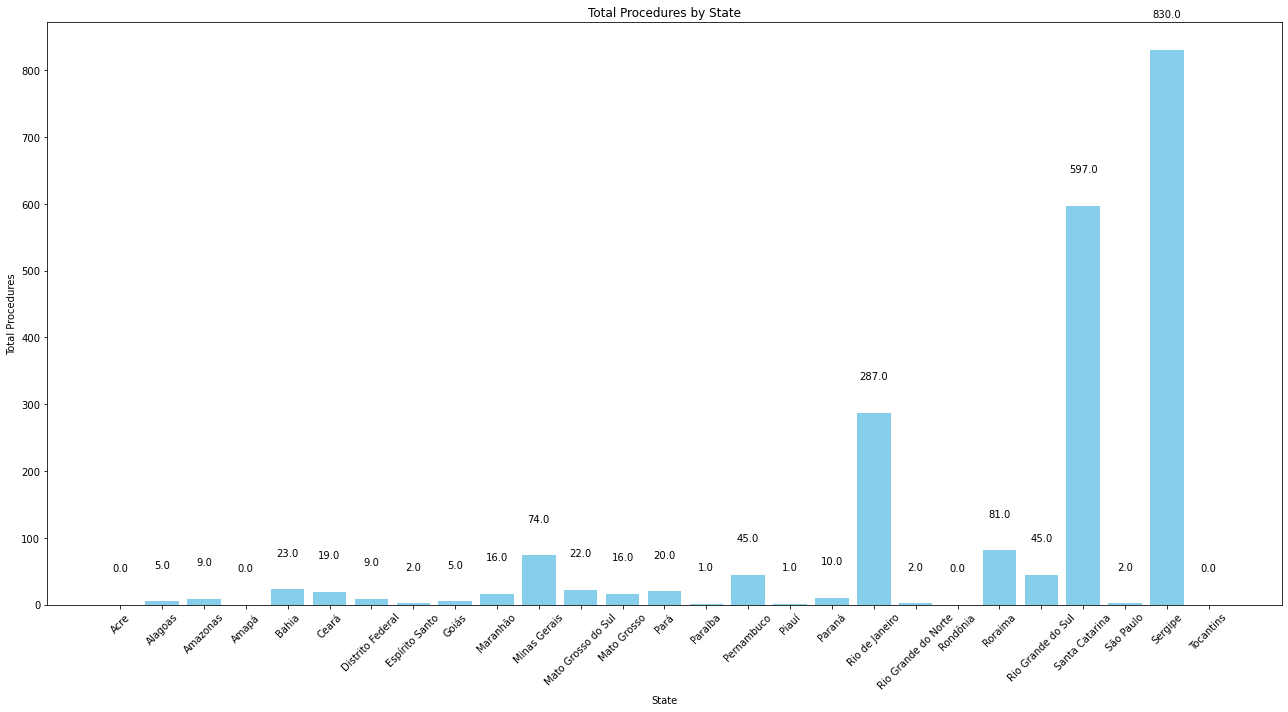

In [25]:
plt.figure(figsize=(18, 10))
plt.bar(total_procedures_df['State'], total_procedures_df['Total Procedures'], color='skyblue')

plt.title('Total Procedures by State')
plt.xlabel('State')
plt.ylabel('Total Procedures')

for i, val in enumerate(total_procedures_df['Total Procedures']):
    plt.text(i, val + 50, str(val), ha='center')

plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

### Brazil's map for Tuberculose A15 based on the data from 01/2023

In [26]:
# Brazil's map Data Wragling

# Read the shapefile data
uf_br = gpd.read_file('map/gadm36_BRA_1.shp')
uf_br_geo = uf_br[['NAME_1', 'geometry']]

# Rename the column to merge the dataset
uf_br_geo.rename(columns={'NAME_1': 'State'}, inplace=True)

# Merge the population data with the GeoDataFrame
merged_df = uf_br_geo.merge(total_procedures_df, on='State')

C:\Users\digui\anaconda3\Lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\digui\AppData\Local\Temp\ipykernel_11848\2156939146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uf_br_geo.rename(columns={'NAME_1': 'State'}, inplace=True)


In [27]:
merged_df.head()

,State,geometry,Total Procedures
0,Acre,"POLYGON ((-68.10553 -10.72192, -68.10547 -10.7...",0.0
1,Alagoas,"MULTIPOLYGON (((-35.88986 -9.84431, -35.88986 ...",5.0
2,Amapá,"MULTIPOLYGON (((-50.82570 2.52208, -50.82570 2...",0.0
3,Amazonas,"POLYGON ((-58.13699 -7.35614, -58.13682 -7.356...",9.0
4,Bahia,"MULTIPOLYGON (((-38.69208 -17.95958, -38.69208...",23.0


C:\Users\digui\anaconda3\Lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\digui\anaconda3\Lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


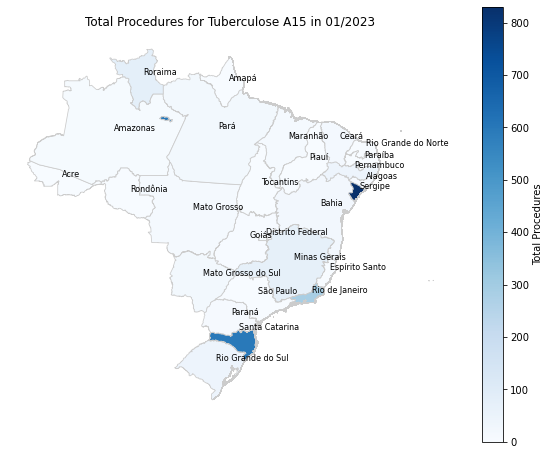

In [28]:
# Iterate through each column (excluding non-numeric columns)
for column in merged_df.columns:
    if column not in ['State', 'geometry']:
        # Normalize population values between 0 and 1 for coloring
        col_min = merged_df[column].min()
        col_max = merged_df[column].max()
        norm = Normalize(vmin=col_min, vmax=col_max)

        # Create a scalar mappable to apply colormap to the map
        sm = ScalarMappable(cmap='Blues', norm=norm)
        sm.set_array([])  # dummy array for the scalar mappable

        # Plot the map with the colored regions
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        merged_df.plot(column=column, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
        ax.set_title(f'{column} for Tuberculose A15 in 01/2023')
        ax.set_axis_off()
        
        # Loop through the rows of the DataFrame to annotate state abbreviations
        for idx, row in merged_df.iterrows():
            state_abbr = row['State']  
            state_geometry = row['geometry'] 
            
            # Get the centroid of the state geometry
            centroid = state_geometry.centroid
            
            # Annotate the abbreviation at the centroid
            ax.annotate(text=state_abbr, xy=(centroid.x, centroid.y), xytext=(3, 3),
                        textcoords="offset points", color='black', fontsize=8)


        # Create colorbar
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label(column)

        # Save or show the map
        plt.savefig(f'{column}_012023_map.png')  # Save the figure as an image
        plt.show()  # Display the figure